In [29]:
# 用sklearn，在iris数据上，实现CART（基尼系数）与ID3（信息增益）两棵树，并画出树结构

from sklearn import datasets
from sklearn import tree
from IPython.display import Image
import pydotplus

iris = datasets.load_iris()
clf1 = tree.DecisionTreeClassifier(criterion="gini")
clf2 = tree.DecisionTreeClassifier(criterion="entropy")
clf1.fit(iris.data, iris.target)
clf2.fit(iris.data, iris.target)

params = {
    "out_file": None,
    "feature_names": iris.feature_names,
    "class_names": iris.target_names,
    "filled": True,
    "rounded": True,
    "special_characters": True}

Fontconfig warning: ignoring C.UTF-8: not a valid language tag



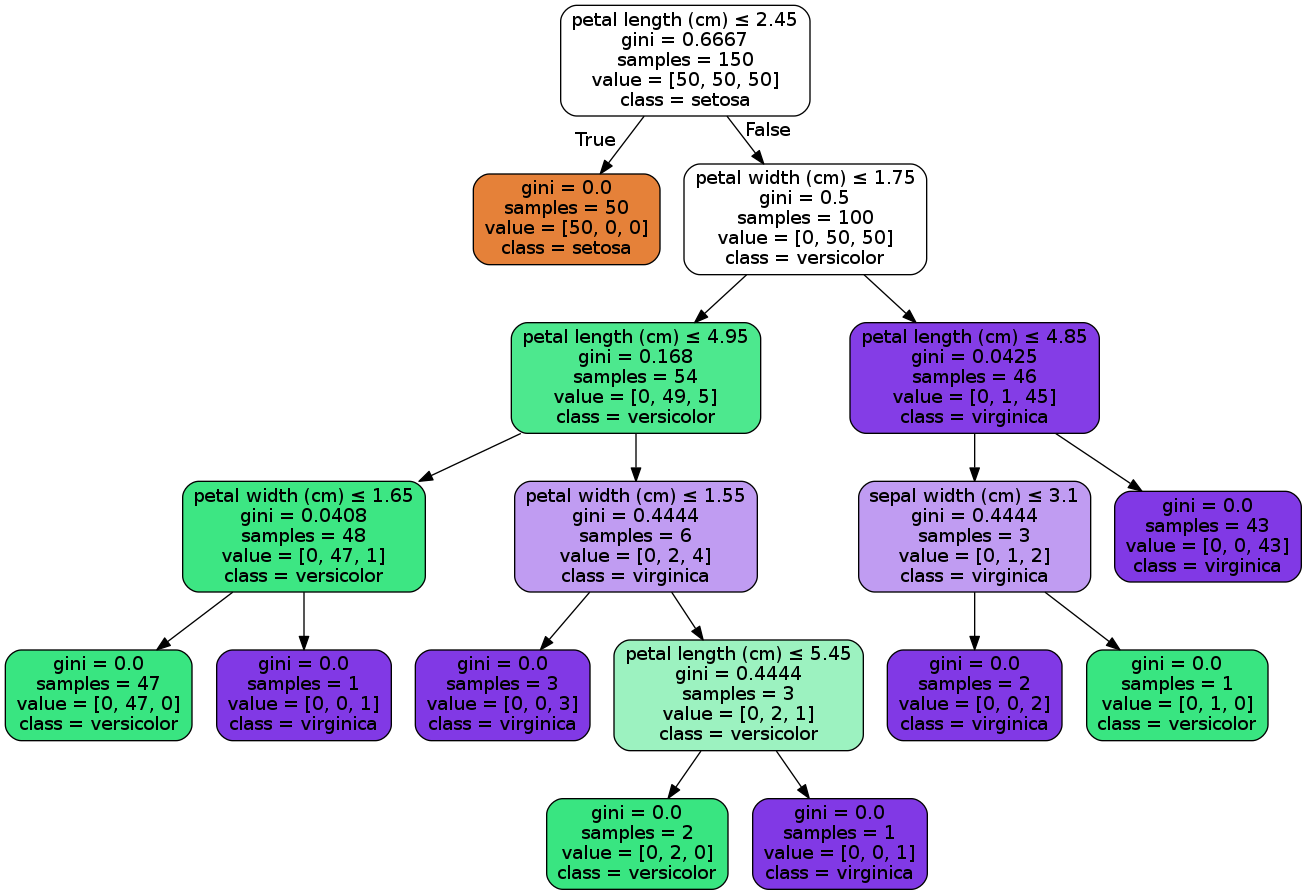

In [30]:
dot1 = tree.export_graphviz(clf1, **params)
Image(pydotplus.graph_from_dot_data(dot1).create_png())

Fontconfig warning: ignoring C.UTF-8: not a valid language tag



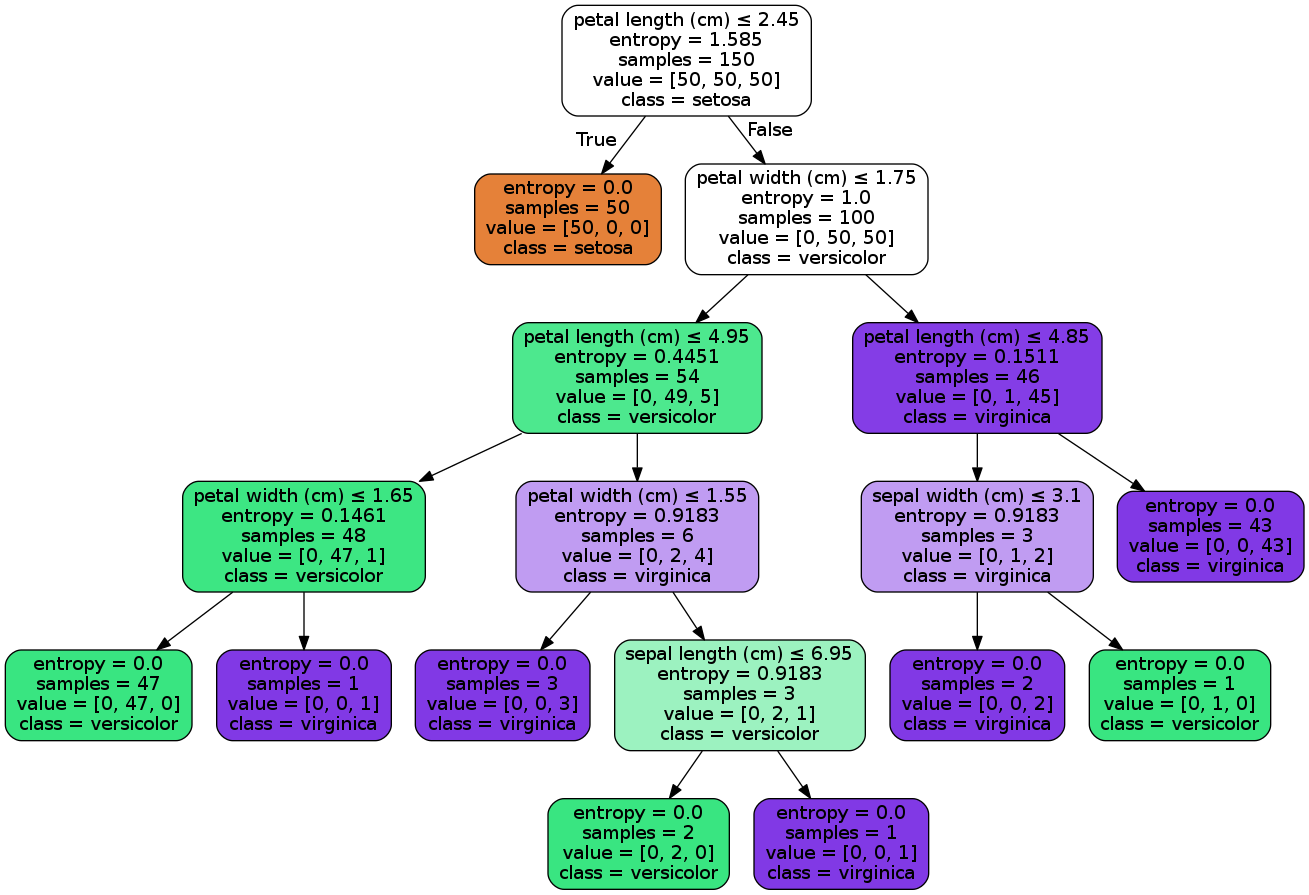

In [18]:
dot2 = tree.export_graphviz(clf2, **params)
Image(pydotplus.graph_from_dot_data(dot2).create_png())

In [44]:
# 选择不同max_depth，用10Fold验证，对两棵树找到最优max_depth
from sklearn.model_selection import StratifiedKFold
import numpy as np

kfold = StratifiedKFold(n_splits=10)

def find_optimal_depth(criterion):
    for depth in range(1, 6):
        scores = []
        clf = tree.DecisionTreeClassifier(criterion=criterion, max_depth=depth)
        for idx_train, idx_test in kfold.split(iris.data, iris.target):
            train_x = iris.data[idx_train]
            train_y = iris.target[idx_train]
            test_x = iris.data[idx_test]
            test_y = iris.target[idx_test]
            clf.fit(train_x, train_y)
            scores.append(clf.score(test_x, test_y))
        print("%s|MaxDepth: %d, Score(Avg.): %.5f" % (criterion, depth, np.mean(scores)))

find_optimal_depth("gini")
find_optimal_depth("entropy")

# 当max_depth设置为3的时候，两种决策树都能得到较好的精确度（0.96）

gini|MaxDepth: 1, Score(Avg.): 0.66667
gini|MaxDepth: 2, Score(Avg.): 0.94667
gini|MaxDepth: 3, Score(Avg.): 0.96000
gini|MaxDepth: 4, Score(Avg.): 0.96000
gini|MaxDepth: 5, Score(Avg.): 0.95333
entropy|MaxDepth: 1, Score(Avg.): 0.66667
entropy|MaxDepth: 2, Score(Avg.): 0.95333
entropy|MaxDepth: 3, Score(Avg.): 0.96000
entropy|MaxDepth: 4, Score(Avg.): 0.95333
entropy|MaxDepth: 5, Score(Avg.): 0.96000
